In [88]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit
MAX_SENTENCE_LENGTH = 300
import nltk
import numpy as np
import torch
from torch.utils.data import Dataset
from nltk.stem.porter import *

In [89]:
stop_words = ["i","i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","to","from","up","down","in","on","off","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","other","some","such","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"]

In [90]:
import spacy
tokenize = spacy.load('en_core_web_sm')
stemmer = PorterStemmer()


In [91]:
import torch
print(torch.__version__)

0.4.1


In [92]:
path_train_pos = "/home/cvh255/nlp_hw1/aclImdb/train/pos/"
path_train_neg = "/home/cvh255/nlp_hw1/aclImdb/train/neg/"

In [93]:
train_pos_files = os.listdir(path_train_pos)
for f in range(len(train_pos_files)):
    train_pos_files[f] = path_train_pos + train_pos_files[f]

In [94]:
train_neg_files = os.listdir(path_train_neg)
for f in range(len(train_neg_files)):
    train_neg_files[f] = path_train_neg + train_neg_files[f]

In [95]:
train_pos_labels = [1]*len(train_pos_files)
train_neg_labels = [0]*len(train_neg_files)

In [96]:
df = pd.DataFrame(columns=["file_names","labels"])
df["file_names"] = train_pos_files+train_neg_files
df["labels"] = train_pos_labels+train_neg_labels

In [97]:
df.shape

(25000, 2)

In [98]:
df.head()

,file_names,labels
0,/home/cvh255/nlp_hw1/aclImdb/train/pos/9258_10...,1
1,/home/cvh255/nlp_hw1/aclImdb/train/pos/3_10.txt,1
2,/home/cvh255/nlp_hw1/aclImdb/train/pos/9597_10...,1
3,/home/cvh255/nlp_hw1/aclImdb/train/pos/3347_7.txt,1
4,/home/cvh255/nlp_hw1/aclImdb/train/pos/2160_8.txt,1


In [99]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(df["file_names"], df["labels"]):
    train_df = df.iloc[train_index]
    val_df = df.iloc[test_index]

In [100]:
train_df.shape,val_df.shape

((20000, 2), (5000, 2))

In [101]:
def get_data(df):
    all_txt = []
    for i,j in df.iterrows():
        f = open(j["file_names"])
        txt = f.read()
        all_txt.append(txt)
#         print(j)
    df["content"] = all_txt
    return df

In [102]:
train_df = get_data(train_df)
val_df = get_data(val_df)

/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [105]:
from nltk import ngrams

In [103]:
import string
punctuations = string.punctuation
def tokenize1(phrase):
    tokens = tokenize(phrase)
    return [token.text.lower() for token in tokens if (token.text not in punctuations and token.text not in stop_words)]
    

In [112]:
bg = list(ngrams(tokenize1("I am going mad! you are nuts and mad again"),4))

In [113]:
bg

[('i', 'going', 'mad', 'nuts'), ('going', 'mad', 'nuts', 'mad')]

In [20]:
[' '.join(a) for a in bg]

['i going mad', 'going mad nuts']

In [114]:
def tokenize_dataset1(dataset,n_gram):
    token_dataset = []
    all_tokens = []
    for sample in dataset:
        tokens = tokenize1(sample)
        bg = list(nltk.bigrams(tokens))
        tg = list(nltk.trigrams(tokens))
        fg = list(ngrams(tokens,4))
        bg_t = [' '.join(a) for a in bg]
        tg_t = [' '.join(a) for a in tg]
        fg_t = [' '.join(a) for a in fg]
        tokens = tokens + bg_t + tg_t + fg_t
        token_dataset.append(tokens)
        all_tokens+=tokens
    return token_dataset, all_tokens

In [115]:
print ("Tokenizing val data")
val_df["tokenized1"], _ = tokenize_dataset1(val_df["content"],1)
# pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_df["tokenized1"], all_train_tokens = tokenize_dataset1(train_df["content"],1)
# pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
# pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))

Tokenizing val data


/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Tokenizing train data


/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [116]:
train_df.head()

,file_names,labels,content,tokenized1
8283,/home/cvh255/nlp_hw1/aclImdb/train/pos/4793_7.txt,1,After seeing this film I feel like I know just...,"[after, seeing, film, i, feel, like, i, know, ..."
10937,/home/cvh255/nlp_hw1/aclImdb/train/pos/11592_1...,1,"My son was 7 years old when he saw this movie,...","[my, son, 7, years, old, saw, movie, russian, ..."
9347,/home/cvh255/nlp_hw1/aclImdb/train/pos/3243_8.txt,1,"Remember the early days of Pay Per View? I do,...","[remember, early, days, pay, per, view, i, alm..."
5430,/home/cvh255/nlp_hw1/aclImdb/train/pos/10129_7...,1,And that's how the greatest comedy of TV start...,"[and, 's, greatest, comedy, tv, started, it, 1..."
4072,/home/cvh255/nlp_hw1/aclImdb/train/pos/9873_7.txt,1,"Lily Mars, a smalltown girl living in Indiana,...","[lily, mars, smalltown, girl, living, indiana,..."


In [118]:
train_df.to_csv("train_df_tok5.csv",index=False)

In [119]:
val_df.to_csv("val_df_tok5.csv",index=False)

In [120]:
import pickle
pickle.dump(all_train_tokens,open("all_tokens5",'wb'))

In [5]:
train_df = pd.read_csv("train_df_tok1.csv")
val_df = pd.read_csv("val_df_tok1.csv")

In [6]:
import pickle
all_train_tokens = pickle.load(open("all_tokens1",'rb'))

In [153]:
from collections import Counter

max_vocab_size = 100000
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [154]:
import random
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 5306 ; token jealous
Token jealous; token id 5306


In [155]:
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_df['token_idized'] = token2index_dataset(train_df['tokenized1'])
val_df['token_idized'] = token2index_dataset(val_df['tokenized1'])
# test_data_indices = token2index_dataset(test_data_tokens)



/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [156]:
train_df.head()

,file_names,labels,content,tokenized1,token_idized
8283,/home/cvh255/nlp_hw1/aclImdb/train/pos/4793_7.txt,1,After seeing this film I feel like I know just...,"[after, seeing, film, i, feel, like, i, know, ...","[398, 253, 6, 2, 164, 11, 2, 60, 52, 154, 3834..."
10937,/home/cvh255/nlp_hw1/aclImdb/train/pos/11592_1...,1,"My son was 7 years old when he saw this movie,...","[my, son, 7, years, old, saw, movie, russian, ...","[303, 407, 1309, 86, 83, 140, 5, 1960, 7343, 2..."
9347,/home/cvh255/nlp_hw1/aclImdb/train/pos/3243_8.txt,1,"Remember the early days of Pay Per View? I do,...","[remember, early, days, pay, per, view, i, alm...","[320, 334, 456, 997, 4083, 642, 2, 147, 320, 5..."
5430,/home/cvh255/nlp_hw1/aclImdb/train/pos/10129_7...,1,And that's how the greatest comedy of TV start...,"[and, 's, greatest, comedy, tv, started, it, 1...","[57, 3, 827, 143, 173, 613, 12, 2463, 86, 170,..."
4072,/home/cvh255/nlp_hw1/aclImdb/train/pos/9873_7.txt,1,"Lily Mars, a smalltown girl living in Indiana,...","[lily, mars, smalltown, girl, living, indiana,...","[4337, 6205, 1, 168, 555, 9991, 1467, 160, 127..."


In [157]:
# train_df.iloc[2,-1]

In [158]:
class IMDBDataset(Dataset):
    def __init__(self, csv_file):
        self.data_frame = csv_file

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
#         print(idx,self.data_frame["token_idized"][idx])
        token_idx = self.data_frame.iloc[idx]["token_idized"]
        label = self.data_frame.iloc[idx]['labels']
#         print(token_idx)
        return [token_idx, len(token_idx), label]




In [159]:
def pad_fun(batch):
    data_list = []
    label_list = []
    length_list = []
#     print(batch[0])
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    for datum in batch:
        if datum[1]>MAX_SENTENCE_LENGTH:
            padded_vec = np.array(datum[0][:MAX_SENTENCE_LENGTH])
        else:
            padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH - datum[1])), 
                                mode="constant", constant_values=0)
#         print(padded_vec.shape)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.from_numpy(np.array(length_list)), torch.from_numpy(np.array(label_list))]

In [160]:
BATCH_SIZE = 100
train_dataset = IMDBDataset(train_df)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = BATCH_SIZE,
                                           collate_fn = pad_fun,
                                           shuffle = True)

val_dataset = IMDBDataset(val_df)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset, 
                                           batch_size = BATCH_SIZE,
                                           collate_fn = pad_fun,
                                           shuffle = True)



In [161]:
# next(iter(train_loader))

In [162]:
# d = next(iter(train_loader))


In [163]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
class BagOfWords(nn.Module):
    def __init__(self, vocab_size, emb_dim):
        super(BagOfWords, self).__init__()
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx = 0)
#         self.linear = nn.Linear(emb_dim,20)
        self.linear = nn.Linear(emb_dim,2)
#         self.linear2 = nn.Linear(100,300)
#         self.linear3 = nn.Linear(300,2)
#         self.dp = nn.Dropout(p=0.5)
    
    def forward(self, data, length):
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
#         out = F.relu(self.linear(out.float()))
#         out = F.relu(self.linear2(out.float()))
#         out = self.linear3(out.float())
#         print(out.size())
        out = self.linear(out.float())
        return out



In [164]:
# next(iter(train_loader))

In [165]:
dataloaders = [train_loader,val_loader]

In [166]:
def training(model,criterion, optimizer, name, num_epochs):
    best_loss = np.inf
    best_acc = 0
    loss_hist = {'train':[],'validate':[]}
    for i in range(num_epochs):
        for enu,phase in enumerate(['train', 'validate']):
            running_loss = 0
            running_total = 0
            correct = 0
            total = 0
            if phase == 'train':
                model.train(True)
            else:
                model.train(False)
            for (data, lengths, labels) in dataloaders[enu]:
                data_batch, length_batch, label_batch = data.cuda(), lengths.cuda(), labels.cuda()
                optimizer.zero_grad()
                outputs = model(data_batch, length_batch)
                loss = criterion(outputs, label_batch)
                if phase=='train':
                    loss.backward()
                    optimizer.step()
                N = labels.size(0)
                
                outputs = F.softmax(model(data_batch, length_batch), dim=1)
                predicted = outputs.max(1, keepdim=True)[1]
#                 print(type(predicted))
                total += labels.size(0)
                correct += predicted.eq(labels.view_as(predicted).cuda()).sum().item()
                running_loss += loss.data[0] * N
                running_total += N
            epoch_loss = running_loss/running_total
            loss_hist[phase].append(epoch_loss.item())
            accuracy = 100 * correct / total
            print('Epoch: {}, Phase: {}, epoch loss: {:.4f}, accuracy: {:.4f}'\
                      .format(i,phase,epoch_loss, accuracy))
        if phase == 'validate' and epoch_loss < best_loss:
            best_loss = epoch_loss
            best_acc = accuracy
            torch.save(model,name)
    print('Best val dice loss: {:4f}, Best Accuracy: {:4f}'.format(best_loss,best_acc))
    return model, loss_hist

In [168]:
emb_dim = 300
model = BagOfWords(len(id2token), emb_dim).cuda()
# model = nn.DataParallel(model)
learning_rate = 0.01
# num_epochs = 100

criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
# optimizer = torch.optim.SGD(model)


m_save, loss_hists = training(model,criterion,optimizer,"model24_tokenize2",10)

/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 0, Phase: train, epoch loss: 0.4717, accuracy: 79.1150
Epoch: 0, Phase: validate, epoch loss: 0.2880, accuracy: 88.9000


/home/cvh255/pyenv/py3.6.3/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type BagOfWords. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1, Phase: train, epoch loss: 0.1437, accuracy: 96.1350
Epoch: 1, Phase: validate, epoch loss: 0.2554, accuracy: 90.3600
Epoch: 2, Phase: train, epoch loss: 0.0456, accuracy: 99.2950
Epoch: 2, Phase: validate, epoch loss: 0.2799, accuracy: 90.1400
Epoch: 3, Phase: train, epoch loss: 0.0170, accuracy: 99.8600
Epoch: 3, Phase: validate, epoch loss: 0.2948, accuracy: 90.6200
Epoch: 4, Phase: train, epoch loss: 0.0080, accuracy: 99.9950
Epoch: 4, Phase: validate, epoch loss: 0.3139, accuracy: 90.6600
Epoch: 5, Phase: train, epoch loss: 0.0047, accuracy: 100.0000
Epoch: 5, Phase: validate, epoch loss: 0.3309, accuracy: 90.5600
Epoch: 6, Phase: train, epoch loss: 0.0030, accuracy: 100.0000
Epoch: 6, Phase: validate, epoch loss: 0.3457, accuracy: 90.3800
Epoch: 7, Phase: train, epoch loss: 0.0021, accuracy: 100.0000
Epoch: 7, Phase: validate, epoch loss: 0.3587, accuracy: 90.4200
Epoch: 8, Phase: train, epoch loss: 0.0015, accuracy: 100.0000
Epoch: 8, Phase: validate, epoch loss: 0.3703

In [169]:
import matplotlib.pyplot as plt

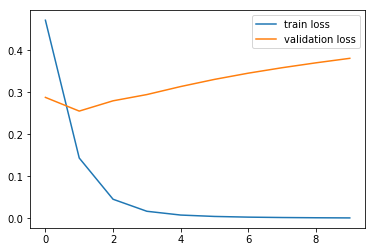

In [170]:
plt.plot(loss_hists['train'],label="train loss")
plt.plot(loss_hists['validate'],label="validation loss")
plt.legend()
plt.show()

In [171]:
import pickle
pickle.dump(loss_hists,open("loss_hist24_t2",'wb'))

In [172]:
class IMDBDataset_test(Dataset):
    def __init__(self, csv_file):
        self.data_frame = csv_file

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
#         print(self.data_frame.iloc[idx].index)
        file_name = self.data_frame.iloc[idx]["file_names"]
        token_idx = self.data_frame.iloc[idx]["token_idized"]
        label = self.data_frame.iloc[idx]['labels']
        return [token_idx, len(token_idx), label,file_name]


def pad_fun_test(batch):
    data_list = []
    label_list = []
    length_list = []
    file_names = []
#     print(batch[0])
    for datum in batch:
        
        label_list.append(datum[2])
        length_list.append(datum[1])
        file_names.append(datum[3])
    for datum in batch:
        if datum[1]>MAX_SENTENCE_LENGTH:
            padded_vec = np.array(datum[0][:MAX_SENTENCE_LENGTH])
        else:
            padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH - datum[1])), 
                                mode="constant", constant_values=0)
#         print(padded_vec.shape)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.from_numpy(np.array(length_list)), torch.from_numpy(np.array(label_list)),np.array(file_names)]

val_dataset_test = IMDBDataset_test(val_df)
val_loader_test = torch.utils.data.DataLoader(dataset = val_dataset_test, 
                                           batch_size = BATCH_SIZE,
                                           collate_fn = pad_fun_test,
                                           shuffle = True)

In [173]:
mod_saved = torch.load("model24_tokenize2")

In [174]:
data, lengths, labels, file_n = next(iter(val_loader_test))
data_batch, length_batch, label_batch = data.cuda(), lengths.cuda(), labels.cuda()
outputs = mod_saved(data_batch, length_batch)
outputs = F.softmax(model(data_batch, length_batch), dim=1)
predicted = outputs.max(1, keepdim=True)[1]
mask =(predicted.squeeze(1).eq(label_batch)).cpu().data.numpy()==0
fns = file_n[mask]
actual_out = labels.data.numpy()[mask]
pred_false = predicted.cpu().data.numpy()[mask]

In [175]:
for i in range(len(fns)):
    print("predicted",pred_false[i][0])
    print("Actual",actual_out[i])
    print(val_df[val_df['file_names'] ==fns[i]]["file_names"].values[0])
    f = open(val_df[val_df['file_names'] ==fns[i]]["file_names"].values[0])
    print(f.read())
    print()
    print("-"*100)

predicted 0
Actual 1
/home/cvh255/nlp_hw1/aclImdb/train/pos/5205_7.txt
A bunch of American students and their tutor decide to visit the ugliest part of Ireland in order to study ancient religious practices. Despite being repeatedly warned about the dangers of straying off the beaten path (by the local creepy Irish guy, natch), they do just that, and wind up with their insides on the outside courtesy of a family of inbred cannibals (the descendants of the infamous Sawney Bean clan, who according to the film's silly plot, upped sticks from Scotland and settled on the Emerald Isle).<br /><br />If you think that porn stars plus low budget horror automatically equals tons of nudity and terrible acting, then think again: Evil Breed is bristling with adult stars, but in fact, there's not nearly as much nudity as one might expect given the 'talent' involved, and the acting, although far from Oscar worthy, ain't all that bad (with the exception of Ginger Lynn Allen, who we know can do marvellou